In [1]:
# Decision Trees
# All codes from http://scikit-learn.org/stable/modules/tree.html

In [2]:
## Classification
## Classification
## Classification

### Create a classifier, using toy training samples
from sklearn import tree
X=[[0,0],[1,1]]
Y=[0,1]
#### Determine the type of the classifier
clf=tree.DecisionTreeClassifier()
clf=clf.fit(X,Y)

In [3]:
### predict
clf.predict([[2.,2.]])

array([1])

In [4]:
### show the probability
clf.predict_proba([[2.,2.]])

array([[0., 1.]])

In [5]:
### Train on the Iris data
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf=tree.DecisionTreeClassifier()
clf=clf.fit(iris.data,iris.target)

In [6]:
### Use graphviz to illustrate the rules of the decision tree jjust trained
import graphviz
dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

In [7]:
### Adding aesthic options to graphviz generated graph

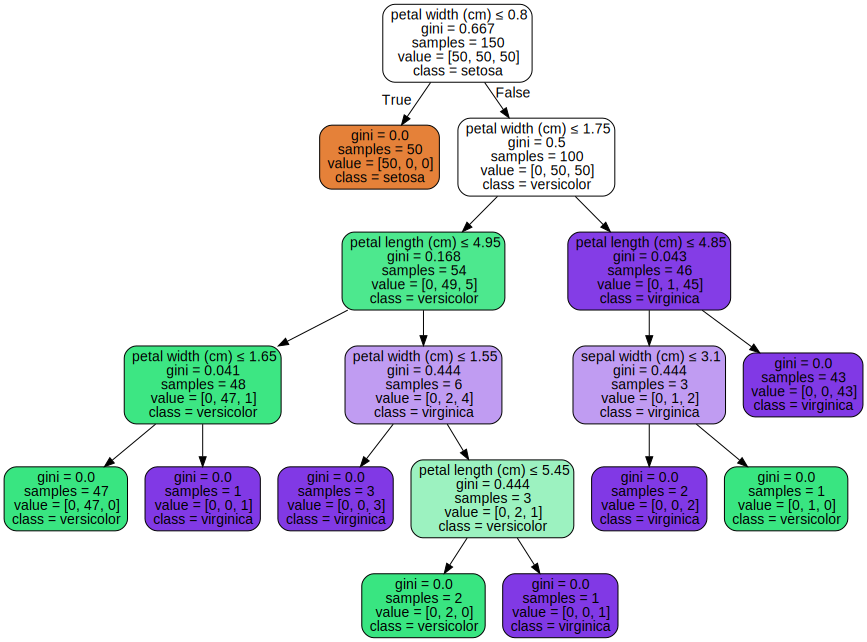

In [8]:
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,
                               filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

Automatically created module for IPython interactive environment


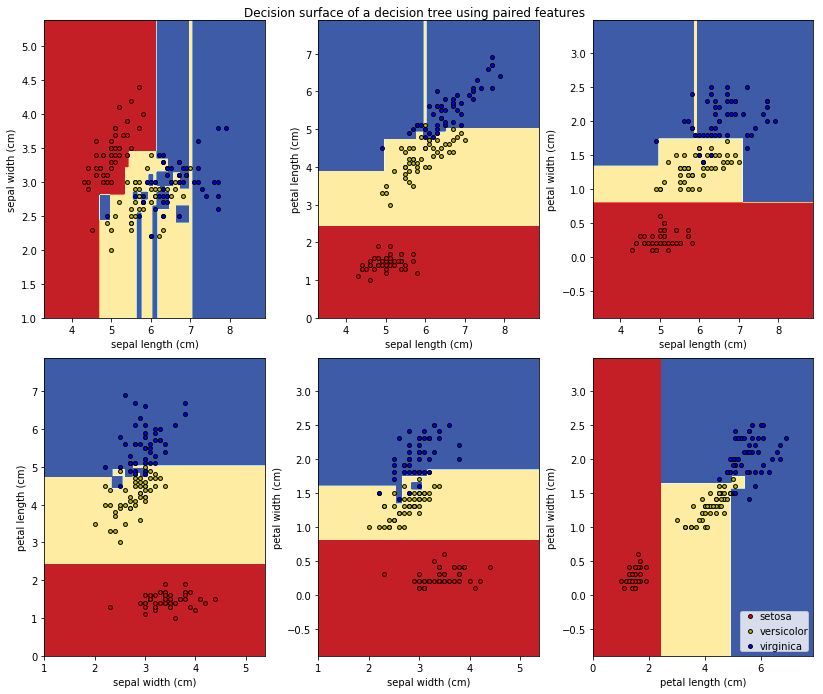

In [9]:
%matplotlib inline
## Plot the decision surface of a decision tree on the iris dataset
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

#Create or activate figure 1, set the figure size
plt.figure(1, figsize=(12, 10))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

In [10]:
## Regression
## Regression
## Regression

from sklearn import tree
X = [[0,0],[2,2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X,y)
clf.predict([[1,1]])

array([0.5])

Automatically created module for IPython interactive environment


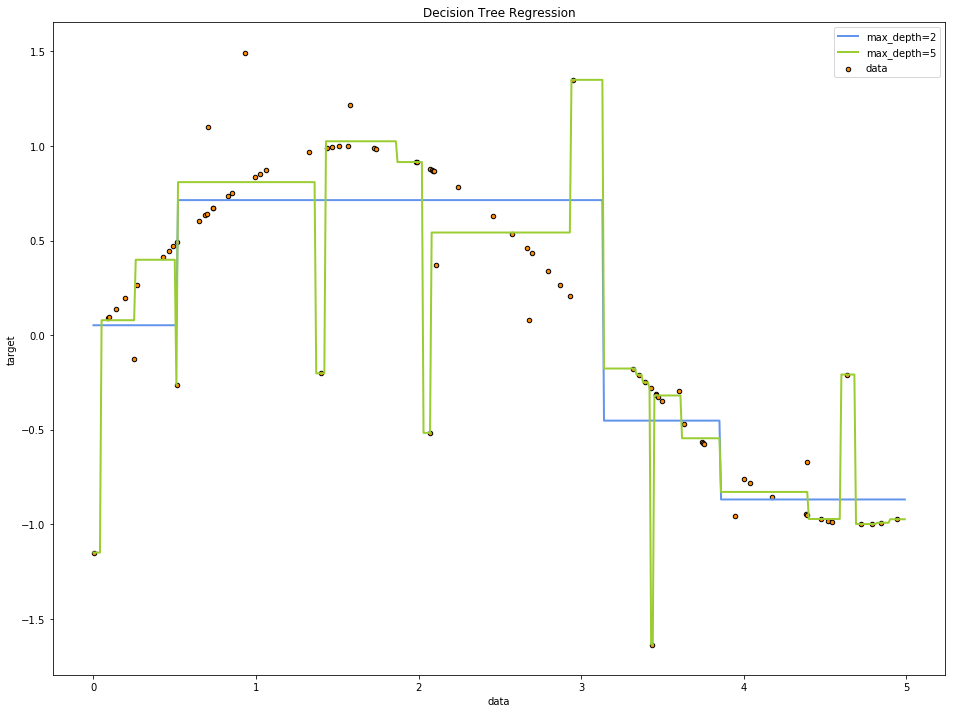

In [11]:
%matplotlib inline
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(2,figsize=(16,12))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [12]:
## Multi-output problems
'''
When there is no correlation between the outputs, a very simple way to solve this kind of problem is 
to build n independent models, i.e. one for each output, 
and then to use those models to independently predict each one of the n outputs.
However, because it is likely that the output values related to the same input are themselves correlated, 
an often better way is to build a single model capable of predicting simultaneously all n outputs. 
First, it requires lower training time since only a single estimator is built. 
Second, the generalization accuracy of the resulting estimator may often be increased.
''' 

'\nWhen there is no correlation between the outputs, a very simple way to solve this kind of problem is \nto build n independent models, i.e. one for each output, \nand then to use those models to independently predict each one of the n outputs.\nHowever, because it is likely that the output values related to the same input are themselves correlated, \nan often better way is to build a single model capable of predicting simultaneously all n outputs. \nFirst, it requires lower training time since only a single estimator is built. \nSecond, the generalization accuracy of the resulting estimator may often be increased.\n'


The decision trees is used to predict simultaneously the noisy x and y observations of a circle given a single underlying feature. 
As a result, it learns local linear regressions approximating the circle.



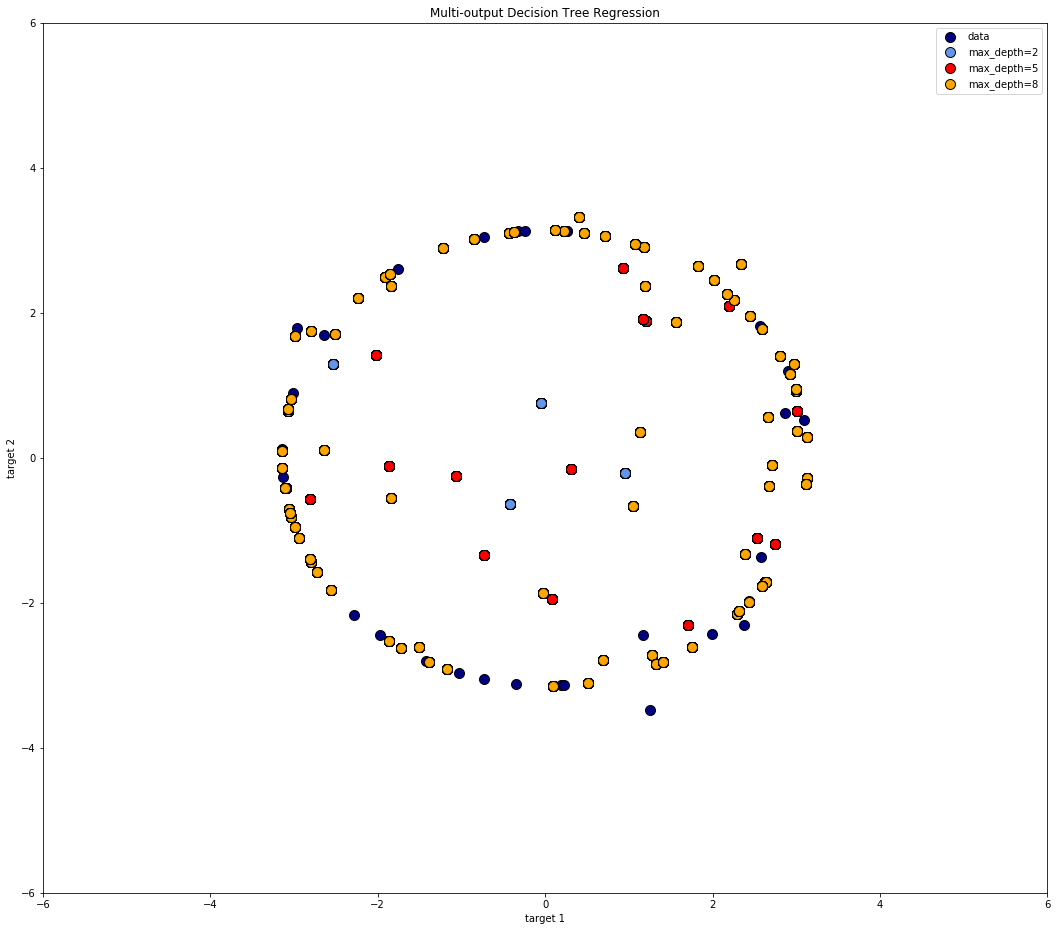

In [13]:
%matplotlib inline
### Multi-output Decision Tree Regression
'''
The decision trees is used to predict simultaneously the noisy x and y observations of a circle given a single underlying feature. 
As a result, it learns local linear regressions approximating the circle.
'''
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure(figsize=(18,16))
# s decide the size of the point
s = 100
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s,
            edgecolor="black", label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s,
            edgecolor="black", label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s,
            edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s,
            edgecolor="black", label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()



The decision trees is used to predict simultaneously the noisy x and y observations of a circle given a single underlying feature. 
As a result, it learns local linear regressions approximating the circle.



/Users/cx513/anaconda/envs/AI/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


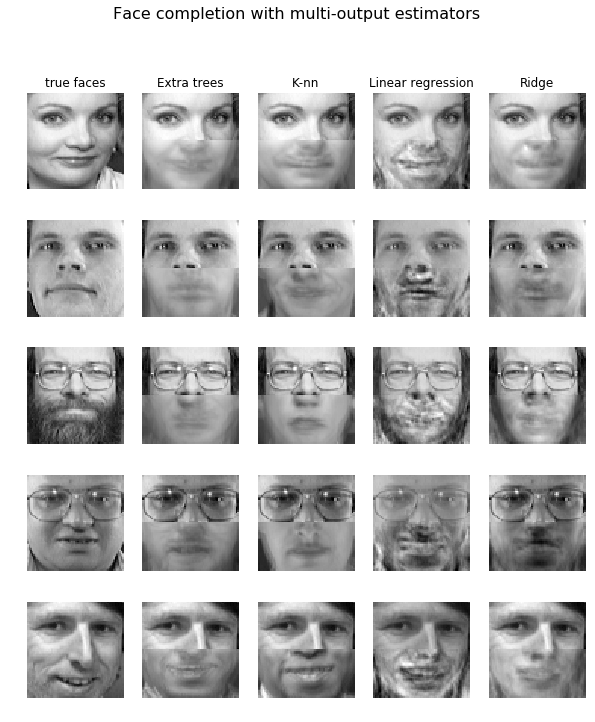

In [14]:
### Face completion with a multi-output estimators
%matplotlib inline

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data = fetch_olivetti_faces()
targets = data.target

data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
#CHANGE this value to alter the number of faces shown
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()

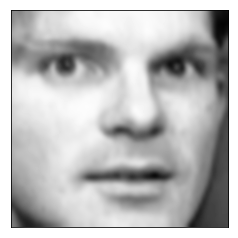

In [15]:
# Randomly show a face from the whole data
q=data[np.random.randint(400)]
q.resize(64,64)
plt.imshow(q, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()